
# ASSIGNED Semibatch reactor

In a semibatch reactor, liquid reactants are constantly fed to the reactor, but there is no flow out of the reactor.  Consider the elementary reaction  with the following scenario: The 200 L reactor starts out half full of 2M species A. It is a little weird, but someone adds a 1M feed of species B is fed to the reactor at a constant volumetric flow rate $v_0$ of 1 L/min. The reaction is $A \rightarrow 2B$ and it proceeds at a rate of $r = k C_A^{0.5}$, with $k = 0.021$ (mol/L)<sup>0.5</sup> / min. 

Determine how long it will take before the reactor is 90% full, the concentration of B at that time, and the total conversion of A.




# solution

The key points to this solution are that:

1.  You must calculate concentration from the number of moles in the system, and the changing volume.
2.  You must account for the volume changing either in the ODE as a differential equation or as an algebraic equation, e.g. $V = V0 + v0 t$.

It is not necessary to use an event, but it is convenient.



The tank is 90% full at t=80.0 min.
The final concentration of B is 2.47 M
The final conversion of A is 0.91

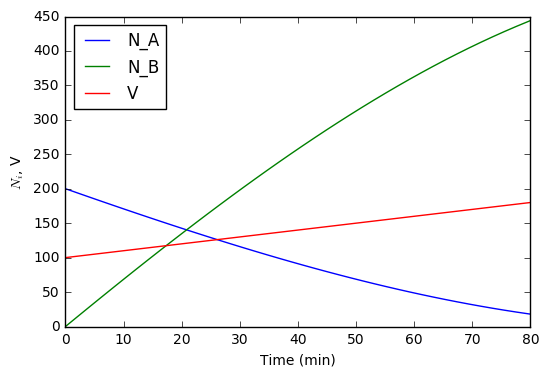

In [1]:
import numpy as np
from pycse import odelay
import matplotlib.pyplot as plt

Vtot = 200  # L total volume
V0 = 100    # L initial volume
Ca0 = 2.0   # initial concentration
v0 = 1.0    # L / min

k = 0.021    # (mol/L)^0.5 / min
Cbfeed = 1.0  # mol / L


def ode(N, t):
    Na, Nb, V = N
    Ca = Na / V
    r = k * Ca**0.5
    ra = -r
    rb = 2 * r
    dNadt = ra * V
    dNbdt = v0 * Cbfeed + rb * V
    dVdt = v0
    return dNadt, dNbdt, dVdt

Na0 = Ca0 * V0
Nb0 = 0.0

# t = 80 minutes by simple inspection
print('The tank is 90% full at t={} min.'.format((0.9 * Vtot - V0) / v0))


def event(N, t):
    Na, Nb, V = N
    value = V - 0.9 * Vtot
    isterminal = True
    direction = 0
    return value, isterminal, direction


tspan = np.linspace(0, 100)

T, N, XE, YE, IE = odelay(ode, [Na0, Nb0, V0], tspan, events=[event])

Na, Nb, V = N[:, 0], N[:, 1], N[:, 2]
plt.plot(T, N)
plt.xlabel('Time (min)')
plt.ylabel('$N_i$, V')
plt.legend(['N_A', 'N_B', 'V'], loc='best')
print('The final concentration of B is {:1.2f} M'.format(Nb[-1] / V[-1]))
print('The final conversion of A is {:1.2f}'.format((Na0 - Na[-1]) / Na0))

The plot is not necessary, but it helps assess your solution is correct. For example, the volume increases linearly as it should, and starts and stops at the right places. The number of moles of A decreases, and the number of moles of B decreases. 

